In [1]:
import sys
import pathlib
pth=str(pathlib.Path().absolute())
sys.path.append(('\\').join(pth.split('\\')[:-1])+"\\Utils")
from Utilities import *

In [3]:
name='c1anemia-300'
di=('\\').join(pth.split('\\')[:-2])+'\\Data_base\\Imagenes_originales\\'+name+'.jpg'
ROI=('\\').join(pth.split('\\')[:-2])+'\\Data_base\\Sem_Auto\\eye_'+name+'.jpg'
img = io.imread(di)
ROI = io.imread(ROI)

In [5]:
f1=open(('\\').join(pth.split('\\')[:-2])+"\\Data_base\\validcrop.txt","r")
lines=f1.readlines()
linesn=np.array(lines)
linesn=np.delete(lines,np.where(linesn=="\n"))
linesn=linesn.reshape(-1,3)
linesnc=v_replace_err(linesn)
linesnc=np.vectorize(pyfunc=lambda x:np.array([x[0].split('\n')[0]]),signature="(n)->(m)")(linesnc.reshape(-1,1)).reshape(-1,3)
xywh=linesnc[:,:2]
imgnames=linesnc[:,2]
xywh=v_no_spaces(xywh)
xywh=np.vectorize(pyfunc=(lambda x:float(x)))(xywh.reshape(1,-1)[0])
xywh=xywh.reshape(-1,4).astype(int)+1

mr=xywh[np.where(imgnames==(name+".jpg"))][0]
mask=assemble_mask(mr,img,ROI)

In [4]:
lum = np.mean(mask,axis=2).astype(int)
mask1=lum>0
m_slic = slic(img, n_segments=20,sigma=5,mask=mask1)

TypeError: slic() got an unexpected keyword argument 'mask'

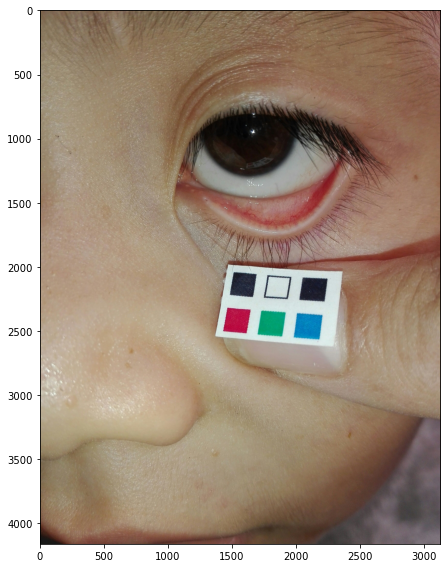

In [6]:
fig, (axi) = plt.subplots(ncols=1, figsize=(32, 8))
axi.imshow(img)

plt.tight_layout()
plt.show()

In [7]:
im=stickerDetection(img)

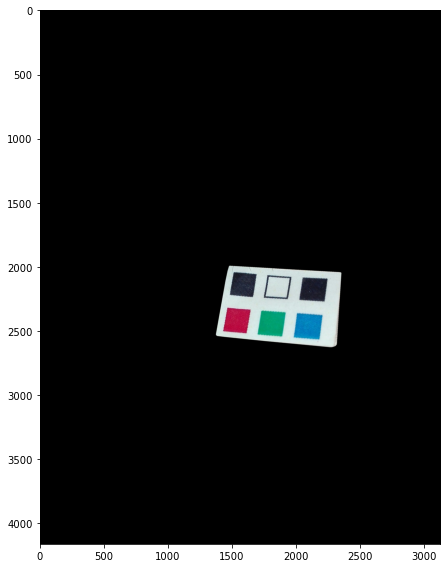

In [8]:
fig, (axi) = plt.subplots(ncols=1, figsize=(32, 8))
axi.imshow(im)

plt.tight_layout()
plt.show()

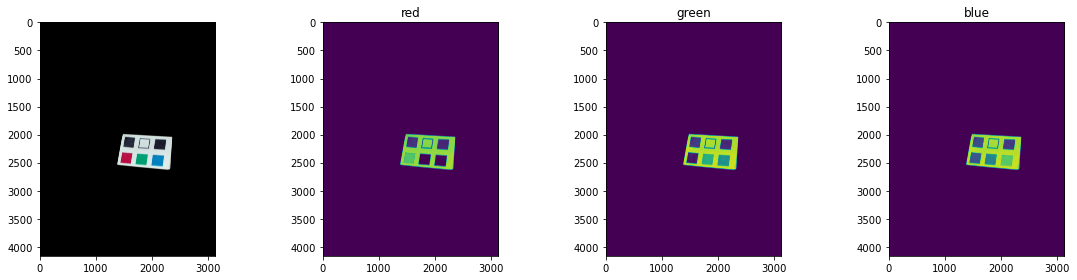

In [9]:
fig, (axo,axr,axg,axb) = plt.subplots(ncols=4, figsize=(16, 4))

axr.set_title("red")
axg.set_title("green")
axb.set_title("blue")

axo.imshow(im)
axr.imshow(im[:,:,0])
axg.imshow(im[:,:,1])
axb.imshow(im[:,:,2])

plt.tight_layout()
plt.show()

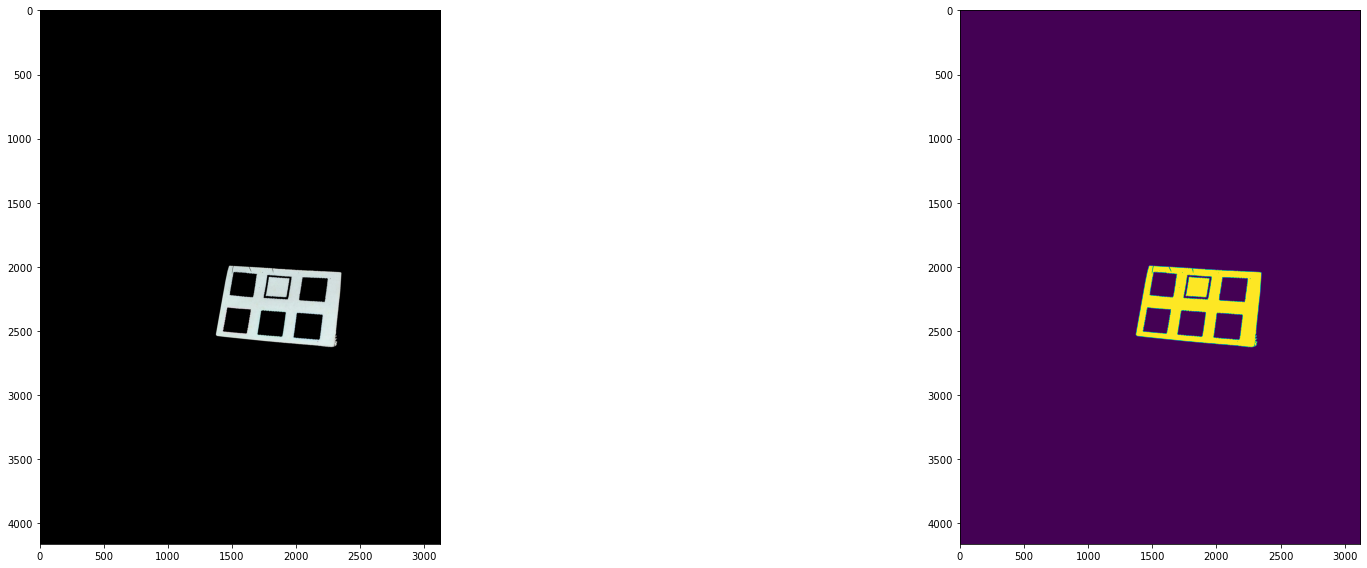

In [23]:
#st_mask=np.logical_or(color.rgb2lab(im)[:,:,0]<20,color.rgb2lab(im)[:,:,0]>70)
st_mask=color.rgb2lab(im)[:,:,0]>80

st_mask_sh=np.concatenate((st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1)),axis=2)

fig, (axi,axo) = plt.subplots(ncols=2, figsize=(32, 8))
axo.imshow(st_mask)
axi.imshow(st_mask_sh*im)

plt.tight_layout()
plt.show()

In [28]:
np.mean(im[st_mask,:])

221.0125663584834

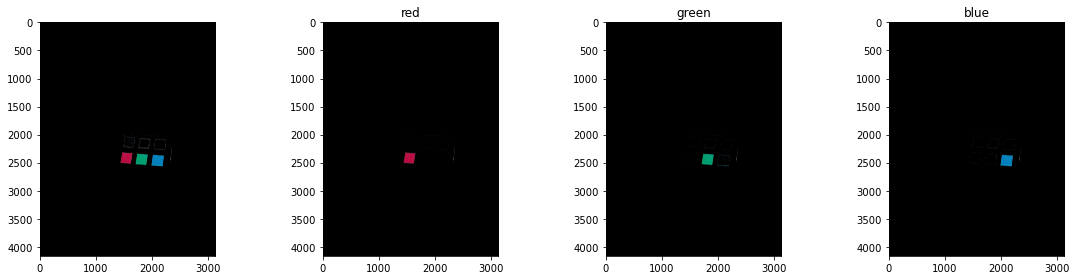

In [111]:
imm=st_mask_sh*im

rmask=imm[:,:,0]>150
gmask=imm[:,:,1]>150
bmask=imm[:,:,2]>150

r_mask_sh=(lambda st_mask:np.concatenate((st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1)),axis=2))(rmask)

g_mask_sh=(lambda st_mask:np.concatenate((st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1)),axis=2))(gmask)

b_mask_sh=(lambda st_mask:np.concatenate((st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1)),axis=2))(bmask)

fig, (axo,axr,axg,axb) = plt.subplots(ncols=4, figsize=(16, 4))

axr.set_title("red")
axg.set_title("green")
axb.set_title("blue")

axo.imshow(imm)
axr.imshow(imm*r_mask_sh)
axg.imshow(imm*g_mask_sh)
axb.imshow(imm*b_mask_sh)

plt.tight_layout()
plt.show()

In [113]:
ir=(imm*r_mask_sh)[:,:,0]
ig=(imm*g_mask_sh)[:,:,1]
ib=(imm*b_mask_sh)[:,:,2]

In [131]:
adj_img=np.concatenate((img[:,:,0].reshape(img.shape[0],img.shape[1],1)*(200/np.max(ir)),
                        img[:,:,1].reshape(img.shape[0],img.shape[1],1)*(200/np.max(ig)),
                        img[:,:,2].reshape(img.shape[0],img.shape[1],1)*(200/np.max(ib))),axis=2).astype(int)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


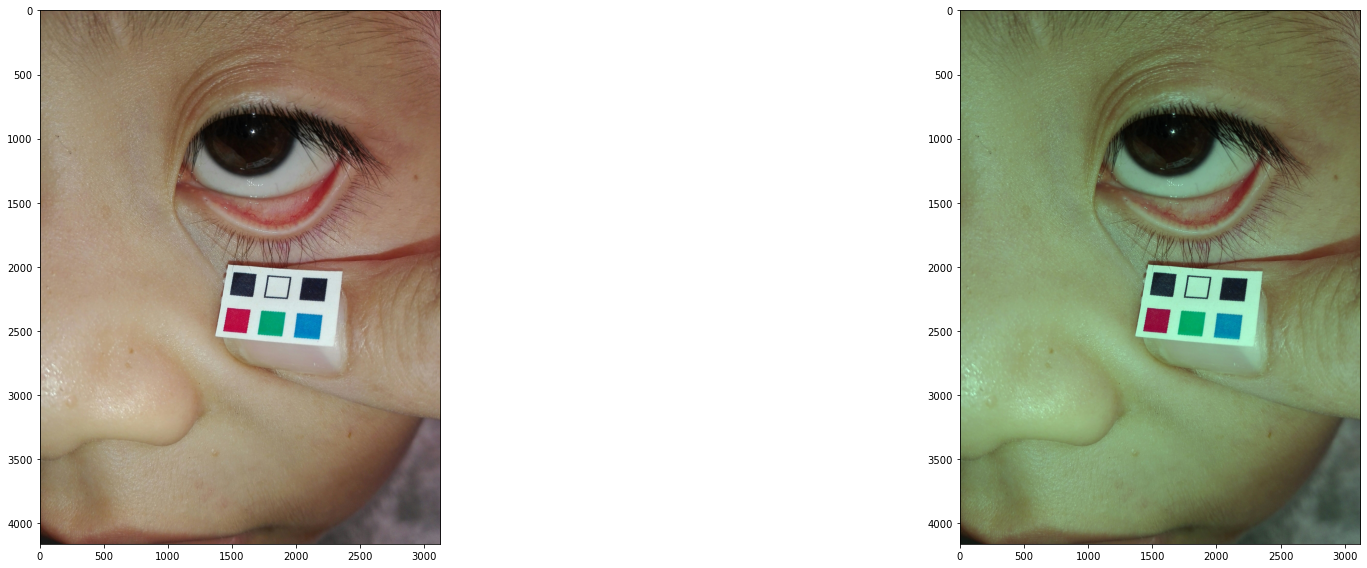

In [132]:
fig, (axo,axa) = plt.subplots(ncols=2, figsize=(32, 8))
axo.imshow(img)
axa.imshow(adj_img)

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


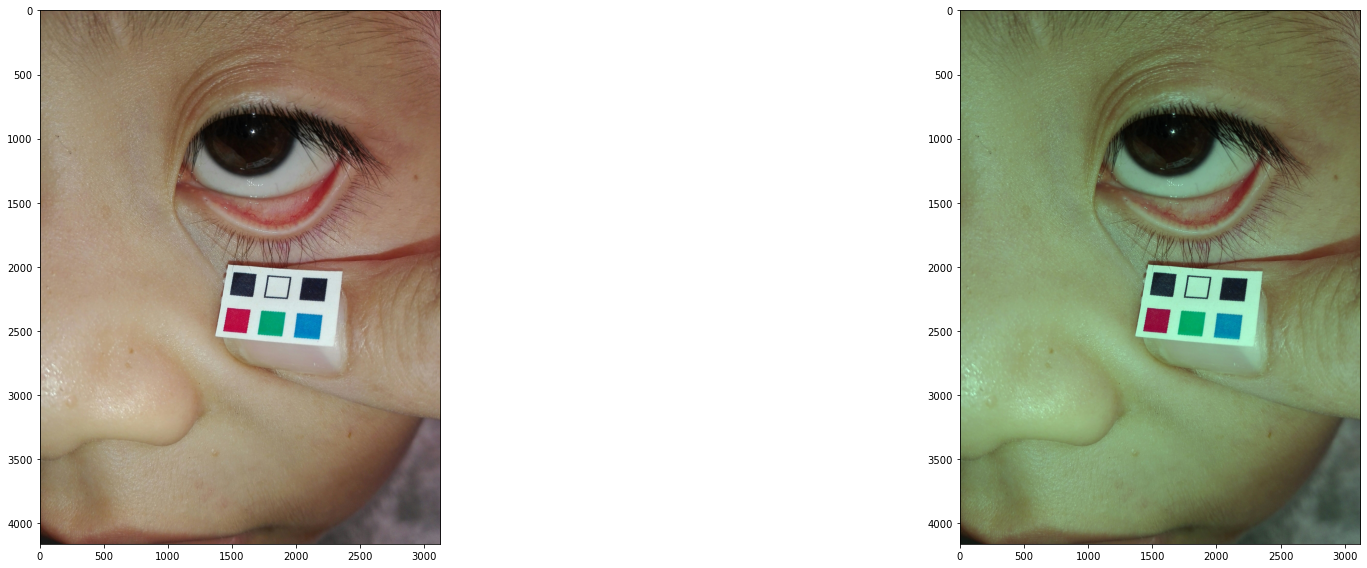

In [133]:
im=stickerDetection(img)

st_mask=np.logical_and(color.rgb2lab(im)[:,:,0]>25,color.rgb2lab(im)[:,:,0]<70)

st_mask_sh=np.concatenate((st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1)),axis=2)

imm=st_mask_sh*im

rmask=imm[:,:,0]>150
gmask=imm[:,:,1]>150
bmask=imm[:,:,2]>150

r_mask_sh=(lambda st_mask:np.concatenate((st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1)),axis=2))(rmask)

g_mask_sh=(lambda st_mask:np.concatenate((st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1)),axis=2))(gmask)

b_mask_sh=(lambda st_mask:np.concatenate((st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1)),axis=2))(bmask)

ir=(imm*r_mask_sh)[:,:,0]
ig=(imm*g_mask_sh)[:,:,1]
ib=(imm*b_mask_sh)[:,:,2]

adj_img=np.concatenate((img[:,:,0].reshape(img.shape[0],img.shape[1],1)*(200/np.max(ir)),
                        img[:,:,1].reshape(img.shape[0],img.shape[1],1)*(200/np.max(ig)),
                        img[:,:,2].reshape(img.shape[0],img.shape[1],1)*(200/np.max(ib))),axis=2).astype(int)

fig, (axo,axa) = plt.subplots(ncols=2, figsize=(32, 8))
axo.imshow(img)
axa.imshow(adj_img)

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


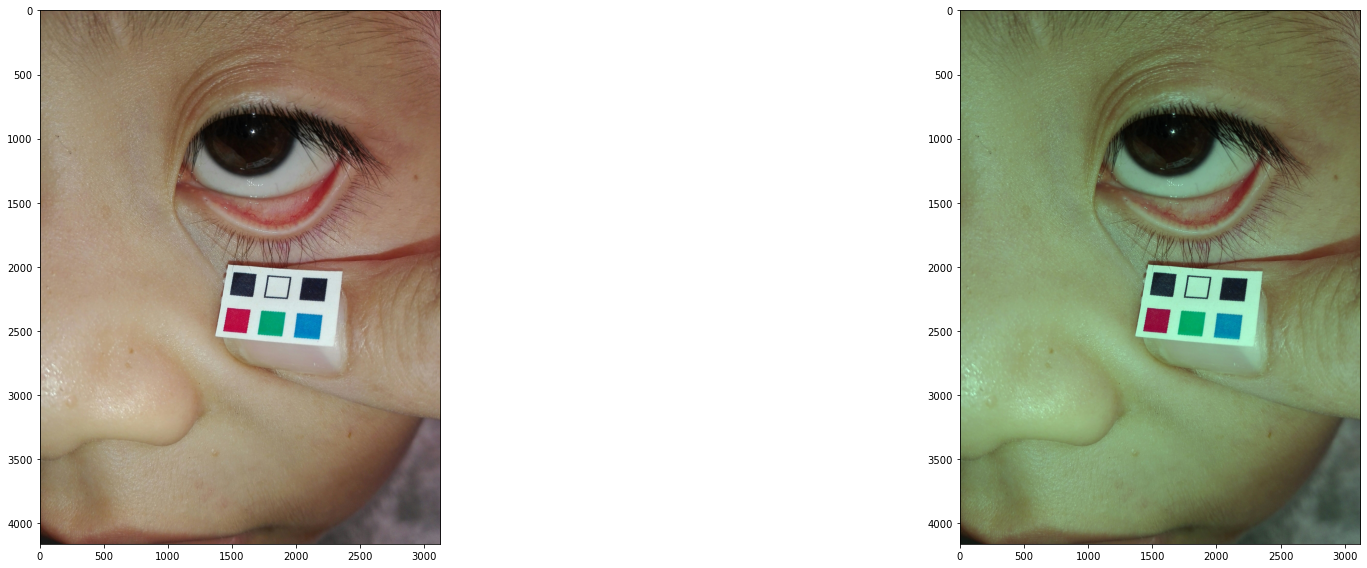

In [10]:
def st_adjust_RGB(img):
    im=stickerDetection(img)

    st_mask=np.logical_and(color.rgb2lab(im)[:,:,0]>25,color.rgb2lab(im)[:,:,0]<70)

    st_mask_sh=np.concatenate((st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1)),axis=2)

    imm=st_mask_sh*im

    rmask=imm[:,:,0]>150
    gmask=imm[:,:,1]>150
    bmask=imm[:,:,2]>150

    r_mask_sh=(lambda st_mask:np.concatenate((st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1)),axis=2))(rmask)

    g_mask_sh=(lambda st_mask:np.concatenate((st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1)),axis=2))(gmask)

    b_mask_sh=(lambda st_mask:np.concatenate((st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1)),axis=2))(bmask)

    ir=(imm*r_mask_sh)[:,:,0]
    ig=(imm*g_mask_sh)[:,:,1]
    ib=(imm*b_mask_sh)[:,:,2]

    adj_img=np.concatenate((img[:,:,0].reshape(img.shape[0],img.shape[1],1)*(200/np.max(ir)),
                        img[:,:,1].reshape(img.shape[0],img.shape[1],1)*(200/np.max(ig)),
                        img[:,:,2].reshape(img.shape[0],img.shape[1],1)*(200/np.max(ib))),axis=2).astype(int)
    return adj_img

adj_img=st_adjust(img)

fig, (axo,axa) = plt.subplots(ncols=2, figsize=(32, 8))
axo.imshow(img)
axa.imshow(adj_img)

plt.tight_layout()
plt.show()

(array([[ 47.,  38.,  44., ..., 893.,  25.,   0.],
        [ 46.,  40.,  44., ..., 906.,  20.,   0.],
        [ 46.,  41.,  44., ..., 902.,  14.,   0.],
        ...,
        [  0.,   0.,   0., ...,   1.,   0.,   0.],
        [  0.,   0.,   0., ...,   1.,   0.,   0.],
        [  0.,   0.,   0., ...,   6.,   7.,   4.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 3120 Lists of Patches objects>)

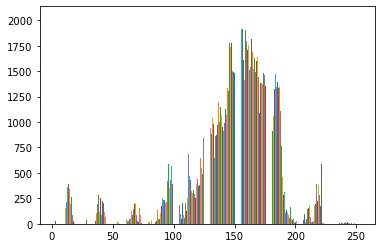

In [16]:
plt.hist(img[:,:,0],range=(0,255))

(array([[ 65.,  43.,  49., ...,   0.,   0.,   0.],
        [ 65.,  45.,  43., ...,   0.,   0.,   0.],
        [ 66.,  46.,  45., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0., 214., ...,   0.,   0.,   0.],
        [  0.,   0., 208., ...,   0.,   0.,   0.],
        [  0.,   0., 195., ...,   5.,   0.,   0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 3120 Lists of Patches objects>)

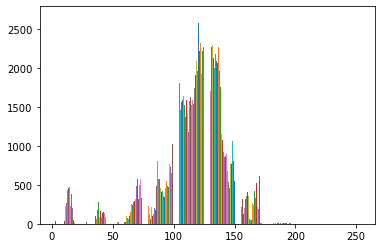

In [17]:
plt.hist(adj_img[:,:,0],range=(0,255))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


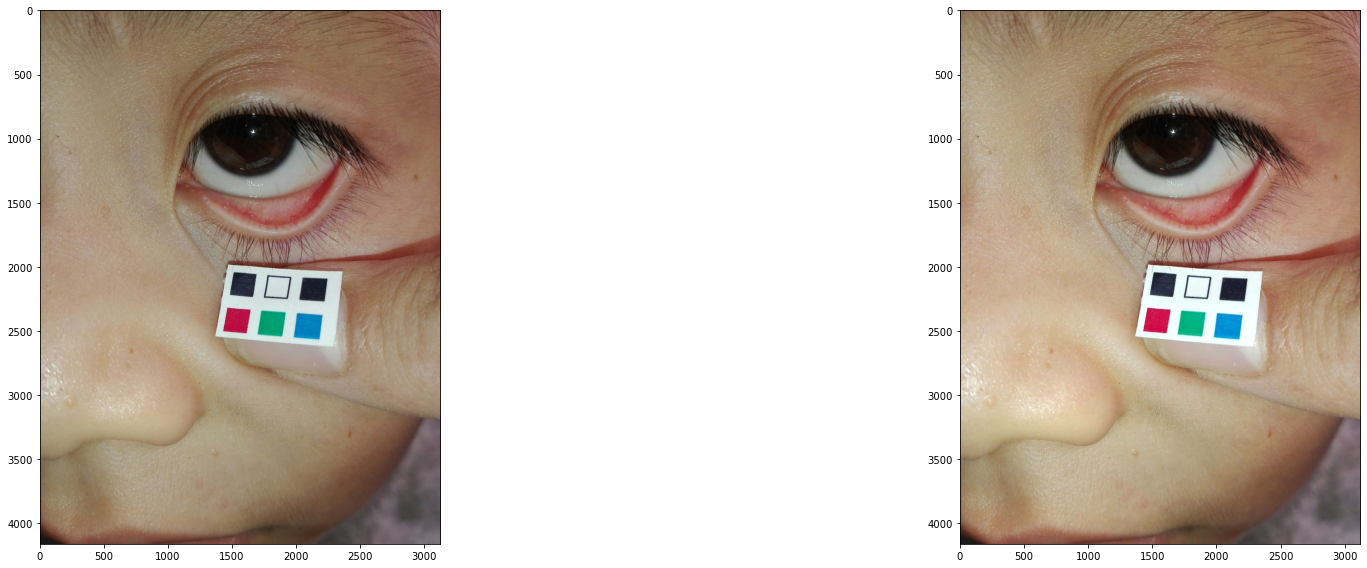

In [7]:
def st_adjust(img):
    im=stickerDetection(img)

    st_mask=color.rgb2lab(im)[:,:,0]>80

    st_mask_sh=np.concatenate((st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1),
                st_mask.reshape(st_mask.shape[0],st_mask.shape[1],1)),axis=2)

    imm=st_mask_sh*im
    
    MB=np.mean(im[st_mask,:])

    adj_img=np.concatenate((img[:,:,0].reshape(img.shape[0],img.shape[1],1)*(200/MB),
                        img[:,:,1].reshape(img.shape[0],img.shape[1],1)*(200/MB),
                        img[:,:,2].reshape(img.shape[0],img.shape[1],1)*(200/MB)),axis=2).astype(int)
    
    return adj_img

adj_img=st_adjust(img)

fig, (axo,axa) = plt.subplots(ncols=2, figsize=(32, 8))
axo.imshow(img)
axa.imshow(adj_img)

plt.tight_layout()
plt.show()

In [ ]:
#Comprebar valores de los stickers despues del ajuste